In [1]:
import os
os.getcwd()

'/Users/jingdu/Documents/CU master/HUDK4051/edm-cup-2023'

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import tarfile
import urllib
import time
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras import initializers
from matplotlib import pyplot as plt
from tensorflow import keras

In [3]:
import io
student_training = pd.read_csv('training_unit_test_scores.csv')
student_predict = pd.read_csv('evaluation_unit_test_scores.csv')
action_logs = pd.read_csv('action_logs.csv')
problem_details = pd.read_csv('problem_details.csv')
assignment_relationships = pd.read_csv('assignment_relationships.csv')

In [4]:
merged_data = action_logs.merge(problem_details, on='problem_id', how='left')
# delet the row that problem_id is NaN
merged_data = merged_data.dropna(subset=['problem_id'])

In [5]:
#check data EDA

In [6]:
merged_data.head()

,assignment_log_id,timestamp,problem_id,max_attempts,available_core_tutoring,score_viewable,continuous_score_viewable,action,hint_id,explanation_id,problem_multipart_id,problem_multipart_position,problem_type,problem_skill_code,problem_skill_description,problem_contains_image,problem_contains_equation,problem_contains_video,problem_text_bert_pca
1,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,3.0,answer,1.0,1.0,problem_started,NaN,NaN,PBZ9XQNT0,1.0,Number,4.NBT.A.3,Rounding Whole Numbers,0.0,0.0,0.0,"[2.40100389,-0.85778539,-2.24408353,2.11064423..."
2,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,NaN,wrong_response,NaN,NaN,PBZ9XQNT0,1.0,Number,4.NBT.A.3,Rounding Whole Numbers,0.0,0.0,0.0,"[2.40100389,-0.85778539,-2.24408353,2.11064423..."
3,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,NaN,wrong_response,NaN,NaN,PBZ9XQNT0,1.0,Number,4.NBT.A.3,Rounding Whole Numbers,0.0,0.0,0.0,"[2.40100389,-0.85778539,-2.24408353,2.11064423..."
4,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,NaN,answer_requested,NaN,NaN,PBZ9XQNT0,1.0,Number,4.NBT.A.3,Rounding Whole Numbers,0.0,0.0,0.0,"[2.40100389,-0.85778539,-2.24408353,2.11064423..."
5,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,NaN,correct_response,NaN,NaN,PBZ9XQNT0,1.0,Number,4.NBT.A.3,Rounding Whole Numbers,0.0,0.0,0.0,"[2.40100389,-0.85778539,-2.24408353,2.11064423..."


In [7]:
merged_data.tail()

,assignment_log_id,timestamp,problem_id,max_attempts,available_core_tutoring,score_viewable,continuous_score_viewable,action,hint_id,explanation_id,problem_multipart_id,problem_multipart_position,problem_type,problem_skill_code,problem_skill_description,problem_contains_image,problem_contains_equation,problem_contains_video,problem_text_bert_pca
23932269,1VVEB3EAGF,1.634919e+09,1QXH2HRDZ,NaN,NaN,NaN,NaN,open_response,NaN,NaN,18YSMZP42U,3.0,Ungraded Open Response,6.RP.A.3a,Making Equivalent Ratio Tables,1.0,0.0,0.0,"[2.33184626,-4.66572058,-1.28410351,-0.2974429..."
23932270,1VVEB3EAGF,1.634919e+09,1QXH2HRDZ,NaN,NaN,NaN,NaN,problem_finished,NaN,NaN,18YSMZP42U,3.0,Ungraded Open Response,6.RP.A.3a,Making Equivalent Ratio Tables,1.0,0.0,0.0,"[2.33184626,-4.66572058,-1.28410351,-0.2974429..."
23932272,1VVEB3EAGF,1.634919e+09,20GKDUW4FH,1.0,no_tutoring,1.0,0.0,problem_started,NaN,NaN,18YSMZP42U,4.0,Ungraded Open Response,6.RP.A.3a,Making Equivalent Ratio Tables,0.0,0.0,0.0,"[-7.42471425,5.01689265,-6.45013021,-1.7648785..."
23932273,1VVEB3EAGF,1.634919e+09,20GKDUW4FH,NaN,NaN,NaN,NaN,open_response,NaN,NaN,18YSMZP42U,4.0,Ungraded Open Response,6.RP.A.3a,Making Equivalent Ratio Tables,0.0,0.0,0.0,"[-7.42471425,5.01689265,-6.45013021,-1.7648785..."
23932274,1VVEB3EAGF,1.634919e+09,20GKDUW4FH,NaN,NaN,NaN,NaN,problem_finished,NaN,NaN,18YSMZP42U,4.0,Ungraded Open Response,6.RP.A.3a,Making Equivalent Ratio Tables,0.0,0.0,0.0,"[-7.42471425,5.01689265,-6.45013021,-1.7648785..."


In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17795561 entries, 1 to 23932274
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   assignment_log_id           object 
 1   timestamp                   float64
 2   problem_id                  object 
 3   max_attempts                float64
 4   available_core_tutoring     object 
 5   score_viewable              float64
 6   continuous_score_viewable   float64
 7   action                      object 
 8   hint_id                     object 
 9   explanation_id              object 
 10  problem_multipart_id        object 
 11  problem_multipart_position  float64
 12  problem_type                object 
 13  problem_skill_code          object 
 14  problem_skill_description   object 
 15  problem_contains_image      float64
 16  problem_contains_equation   float64
 17  problem_contains_video      float64
 18  problem_text_bert_pca       object 
dtypes: float64(8), obje

In [9]:
merged_data["available_core_tutoring"].value_counts()

no_tutoring    1932039
hint           1743910
answer         1429320
explanation     140591
Name: available_core_tutoring, dtype: int64

In [10]:
merged_data.describe()

,timestamp,max_attempts,score_viewable,continuous_score_viewable,problem_multipart_position,problem_contains_image,problem_contains_equation,problem_contains_video
count,1.779556e+07,5.245860e+06,5.245860e+06,5.245860e+06,1.745256e+07,1.745246e+07,1.745246e+07,1.745246e+07
mean,1.611269e+09,2.382467e+00,9.907491e-01,6.912337e-01,2.568773e+00,4.561165e-01,1.603950e-01,3.472291e-05
std,2.070955e+07,9.239691e-01,9.573576e-02,4.619846e-01,2.893483e+00,4.980705e-01,3.669720e-01,5.892513e-03
min,1.551122e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.599498e+09,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.605724e+09,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.618005e+09,3.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.674582e+09,3.000000e+00,1.000000e+00,1.000000e+00,5.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
#bar plot for categorical variable

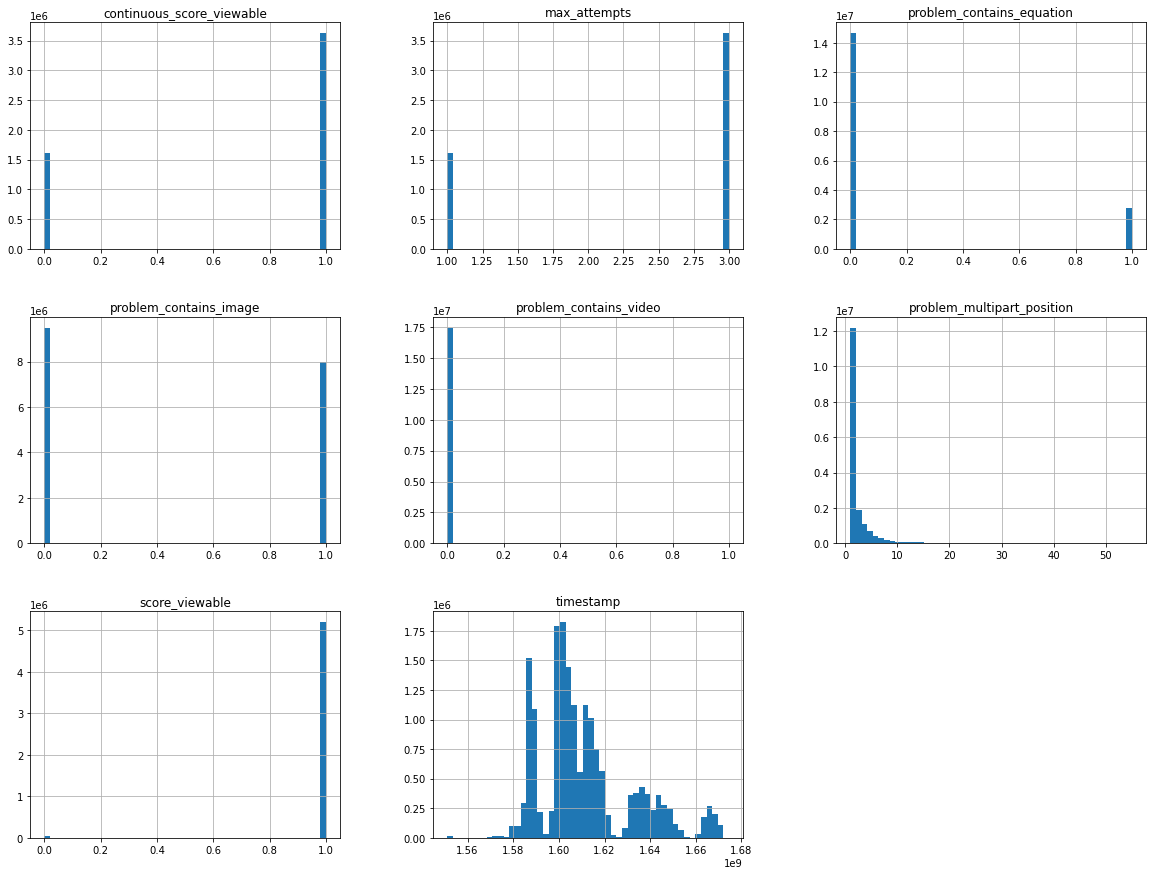

In [12]:
merged_data.hist(bins=50,figsize=(20,15))
plt.show()

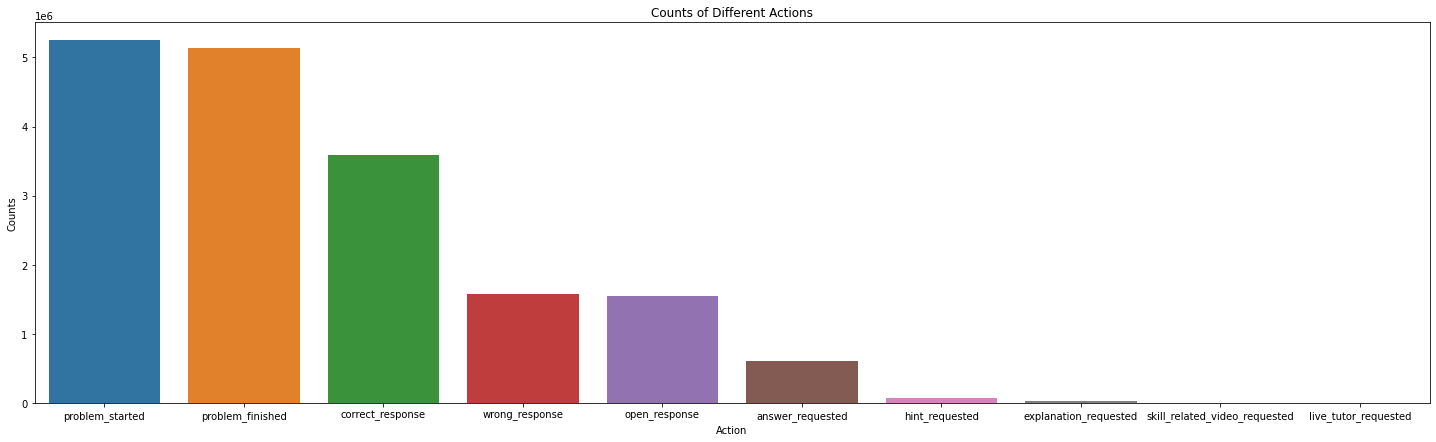

In [13]:
#show the details about Action
import seaborn as sns
#count variable
action_counts = merged_data['action'].value_counts()

#create his variable count
plt.figure(figsize=(25,7))#set the picture size
sns.barplot(x=action_counts.index, y=action_counts.values)

#set his title and xy
plt.title('Counts of Different Actions')
plt.xlabel('Action')
plt.ylabel('Counts')

#show plt
plt.show()

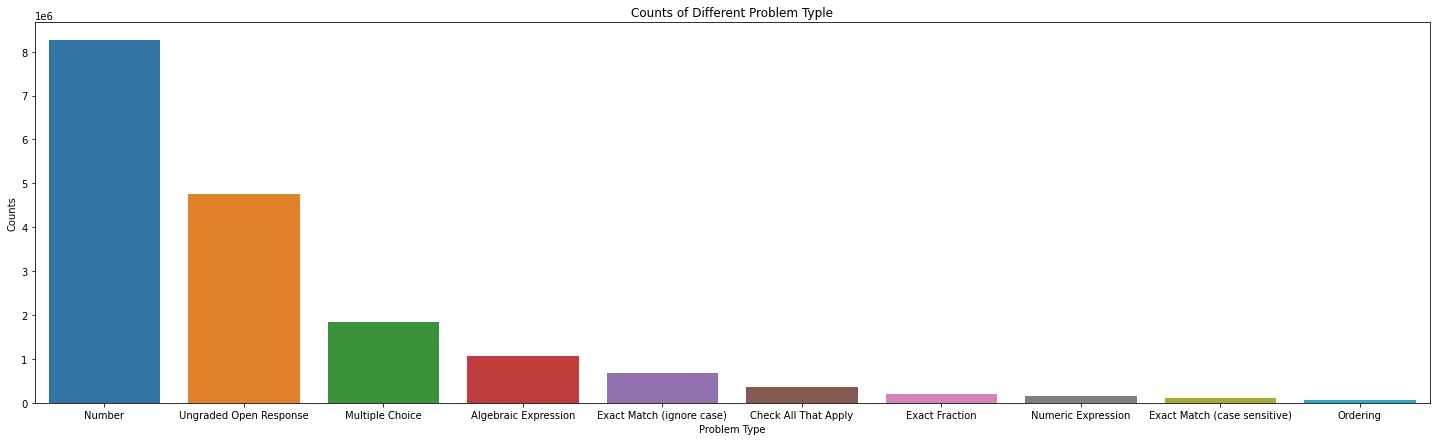

In [14]:
#show the details about Probelm_type

#count variable
problem_counts = merged_data['problem_type'].value_counts()

#create his variable count
plt.figure(figsize=(25,7))#set the picture size
sns.barplot(x=problem_counts.index, y=problem_counts.values)

#set his title and xy
plt.title('Counts of Different Problem Typle')
plt.xlabel('Problem Type')
plt.ylabel('Counts')

#show plt
plt.show()

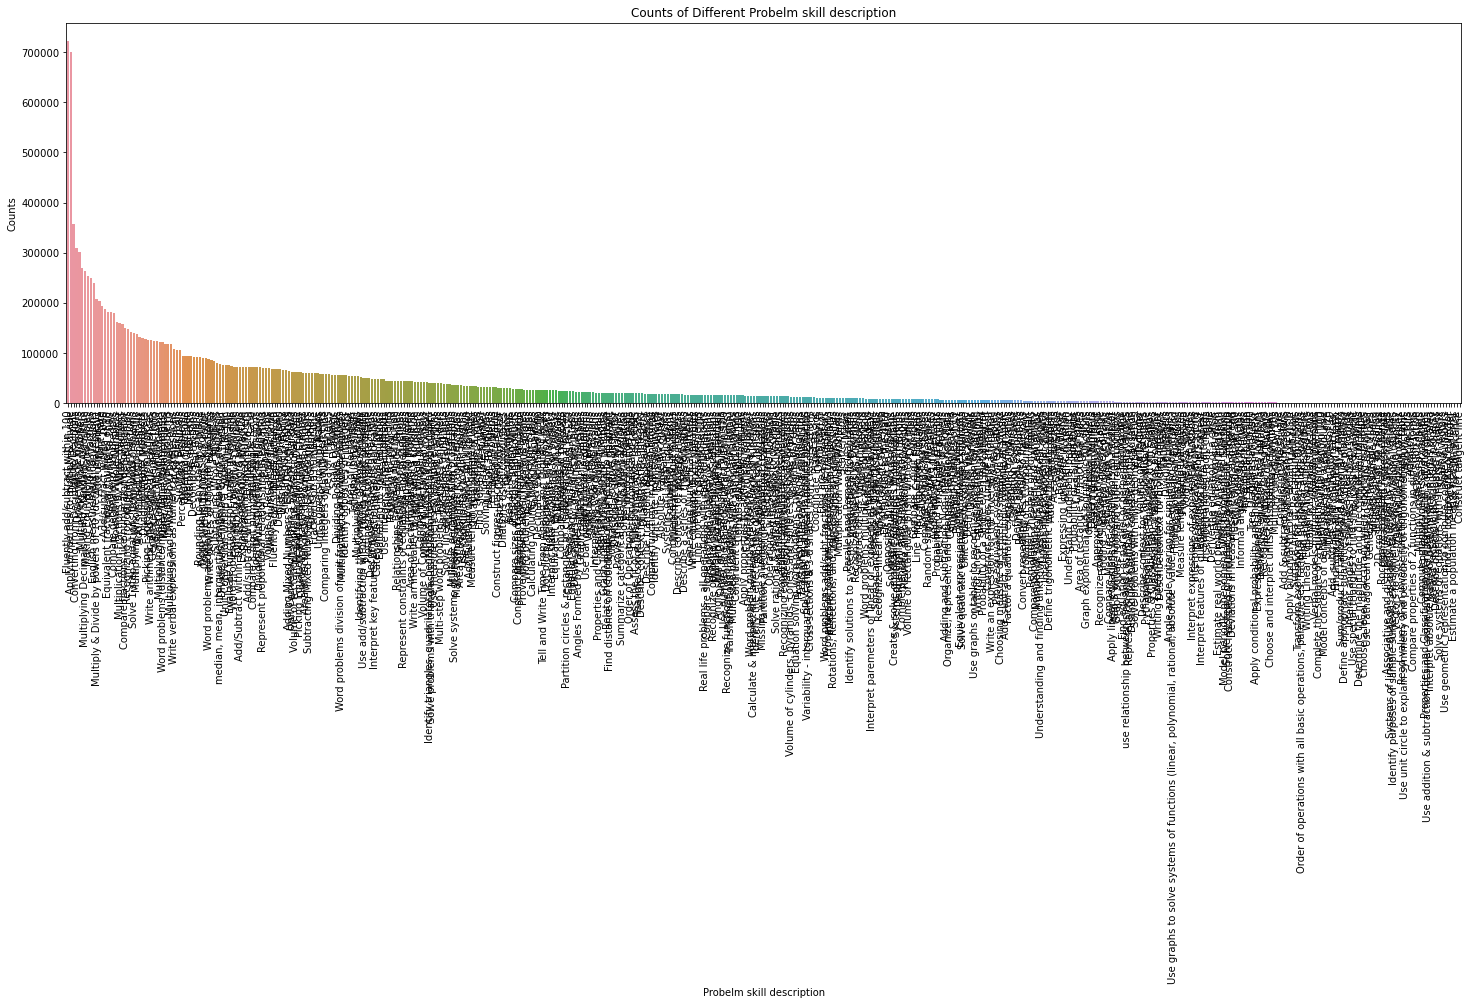

In [15]:
#show the details about Probelm_skill_description

#count variable
probelm_skill_description_counts = merged_data['problem_skill_description'].value_counts()

#create his variable count
plt.figure(figsize=(25,7))#set the picture size
sns.barplot(x=probelm_skill_description_counts.index, y=probelm_skill_description_counts.values)

#set his title and xy
plt.title('Counts of Different Probelm skill description')
plt.xlabel('Probelm skill description')
plt.ylabel('Counts')

#turn x asix
plt.xticks(rotation=90)

#show plt
plt.show()

In [16]:
#drop variable which is useless in the project
#we do not have to use hint_detail.csv, explanation_detail.csv
#problem_text_bert_pca is not useful
#we already keeped probelm_skill description
merged_data.drop(columns = ['hint_id'], inplace=True)
merged_data.drop(columns = ['explanation_id'], inplace=True)
merged_data.drop(columns = ['problem_text_bert_pca'], inplace=True)
merged_data.drop(columns = ['problem_skill_code'], inplace=True)
merged_data.head()

,assignment_log_id,timestamp,problem_id,max_attempts,available_core_tutoring,score_viewable,continuous_score_viewable,action,problem_multipart_id,problem_multipart_position,problem_type,problem_skill_description,problem_contains_image,problem_contains_equation,problem_contains_video
1,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,3.0,answer,1.0,1.0,problem_started,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
2,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,NaN,wrong_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
3,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,NaN,wrong_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
4,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,NaN,answer_requested,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
5,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,NaN,correct_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0


In [17]:
#check NA value for available_core_tutoring
merged_data['available_core_tutoring'].isnull().sum()*100/len(merged_data['available_core_tutoring'])

70.5215250027802

In [18]:
#check NA value for problem_id
merged_data['problem_id'].isnull().sum()

0

In [19]:
#drop the column with high NA value(over 50%)
merged_data.drop(columns = ['available_core_tutoring'],inplace=True)
merged_data.head()

,assignment_log_id,timestamp,problem_id,max_attempts,score_viewable,continuous_score_viewable,action,problem_multipart_id,problem_multipart_position,problem_type,problem_skill_description,problem_contains_image,problem_contains_equation,problem_contains_video
1,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,3.0,1.0,1.0,problem_started,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
2,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,wrong_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
3,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,wrong_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
4,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,answer_requested,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
5,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,NaN,NaN,NaN,correct_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0


In [20]:
#replace NA value for columns max_attempts
merged_data["max_attempts"] = merged_data["max_attempts"].fillna(0)
print(merged_data)

         assignment_log_id     timestamp  problem_id  max_attempts  \
1               2QV1F2GSBZ  1.599151e+09   I2GX4OQIE           3.0   
2               2QV1F2GSBZ  1.599151e+09   I2GX4OQIE           0.0   
3               2QV1F2GSBZ  1.599151e+09   I2GX4OQIE           0.0   
4               2QV1F2GSBZ  1.599151e+09   I2GX4OQIE           0.0   
5               2QV1F2GSBZ  1.599151e+09   I2GX4OQIE           0.0   
...                    ...           ...         ...           ...   
23932269        1VVEB3EAGF  1.634919e+09   1QXH2HRDZ           0.0   
23932270        1VVEB3EAGF  1.634919e+09   1QXH2HRDZ           0.0   
23932272        1VVEB3EAGF  1.634919e+09  20GKDUW4FH           1.0   
23932273        1VVEB3EAGF  1.634919e+09  20GKDUW4FH           0.0   
23932274        1VVEB3EAGF  1.634919e+09  20GKDUW4FH           0.0   

          score_viewable  continuous_score_viewable            action  \
1                    1.0                        1.0   problem_started   
2            

In [21]:
#create new string variable for score_viewable_str and continuous_score_viewable_str
merged_data['score_viewable_str'] = merged_data['score_viewable'].apply(lambda x: 'viewable' if x == 1 else 'not_viewable')
merged_data['continuous_score_viewable_str'] = merged_data['continuous_score_viewable'].apply(lambda x: 'continuous' if x == 1 else 'not_continuous')

In [22]:
#combine with problem_started in column action 
merged_data.loc[merged_data['action'] == 'problem_started', 'action'] = (
    'problem_started_' +
    merged_data.loc[merged_data['action'] == 'problem_started', 'score_viewable_str'] +
    '_' +
    merged_data.loc[merged_data['action'] == 'problem_started', 'continuous_score_viewable_str']
)

In [23]:
#delete the string variable we created
merged_data = merged_data.drop(columns=['score_viewable_str', 'continuous_score_viewable_str'])

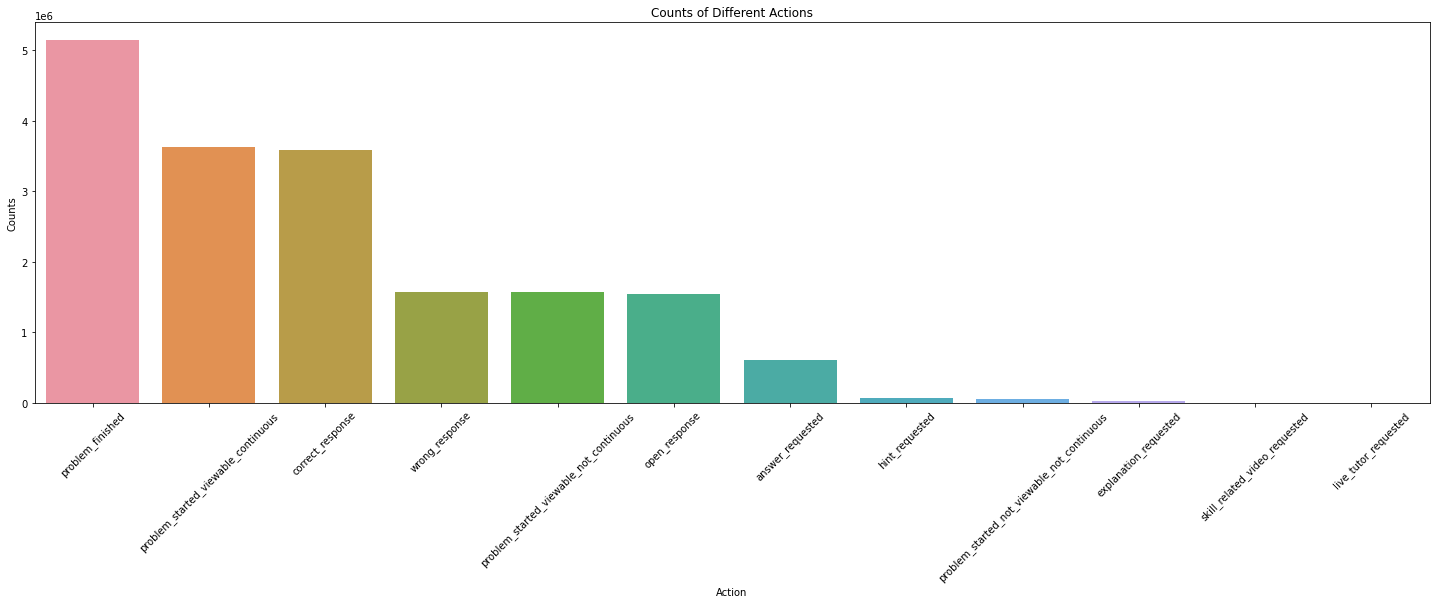

In [24]:
#check details of new action_counts
action_counts = merged_data['action'].value_counts()

#create his variable count
plt.figure(figsize=(25,7))#set the picture size
sns.barplot(x=action_counts.index, y=action_counts.values)

#set his title and xy
plt.title('Counts of Different Actions')
plt.xlabel('Action')
plt.ylabel('Counts')

#turn x asix
plt.xticks(rotation=45)

#show plt
plt.show()

In [25]:
# get the row of action, names as 'wrong_response' 
wrong_response_data = action_logs[action_logs['action'] == 'wrong_response']

# get value of 'score_viewable' and 'continuous_score_viewable' from wrong_response_data 
score_viewable_wrong_response = wrong_response_data['score_viewable']
continuous_score_viewable_wrong_response = wrong_response_data['continuous_score_viewable']
print(score_viewable_wrong_response)
print(continuous_score_viewable_wrong_response)

2          NaN
3          NaN
31         NaN
164        NaN
276        NaN
            ..
23932201   NaN
23932202   NaN
23932203   NaN
23932204   NaN
23932210   NaN
Name: score_viewable, Length: 1580102, dtype: float64
2          NaN
3          NaN
31         NaN
164        NaN
276        NaN
            ..
23932201   NaN
23932202   NaN
23932203   NaN
23932204   NaN
23932210   NaN
Name: continuous_score_viewable, Length: 1580102, dtype: float64


In [26]:
#check NA value
score_viewable_wrong_response.isnull().sum()*100/len(score_viewable_wrong_response)

100.0

In [27]:
#check NA value
continuous_score_viewable_wrong_response.isnull().sum()*100/len(continuous_score_viewable_wrong_response)

100.0

In [28]:
#delete score_viewable and continuous_score_viewable, because we already incode these value in to problem_started in action
merged_data.drop(columns = ['score_viewable'], inplace=True)
merged_data.drop(columns = ['continuous_score_viewable'], inplace=True)

In [29]:
#check missing value for dataset again
merged_data.isnull().sum()

assignment_log_id                  0
timestamp                          0
problem_id                         0
max_attempts                       0
action                             0
problem_multipart_id          342998
problem_multipart_position    342998
problem_type                  342998
problem_skill_description     463383
problem_contains_image        343106
problem_contains_equation     343106
problem_contains_video        343106
dtype: int64

In [30]:
#check NA percentage of problem_skill_description, because it is just 2.6% so we replace the NA value as 0
merged_data['problem_skill_description'].isnull().sum()*100/len(merged_data['problem_skill_description'])
merged_data["problem_skill_description"] = merged_data["problem_skill_description"].fillna(0)

In [31]:
#delete NA value of problem_type
merged_data=merged_data.dropna(subset=['problem_type'])

In [32]:
merged_data.isnull().sum()

assignment_log_id               0
timestamp                       0
problem_id                      0
max_attempts                    0
action                          0
problem_multipart_id            0
problem_multipart_position      0
problem_type                    0
problem_skill_description       0
problem_contains_image        108
problem_contains_equation     108
problem_contains_video        108
dtype: int64

In [33]:
merged_data.head()

,assignment_log_id,timestamp,problem_id,max_attempts,action,problem_multipart_id,problem_multipart_position,problem_type,problem_skill_description,problem_contains_image,problem_contains_equation,problem_contains_video
1,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,3.0,problem_started_viewable_continuous,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
2,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,0.0,wrong_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
3,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,0.0,wrong_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
4,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,0.0,answer_requested,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0
5,2QV1F2GSBZ,1.599151e+09,I2GX4OQIE,0.0,correct_response,PBZ9XQNT0,1.0,Number,Rounding Whole Numbers,0.0,0.0,0.0


In [34]:
merged_data["problem_contains_image"] = merged_data["problem_contains_image"].fillna(0)
merged_data["problem_contains_equation"] = merged_data["problem_contains_equation"].fillna(0)
merged_data["problem_contains_video"] = merged_data["problem_contains_video"].fillna(0)

In [35]:
merged_data.isnull().sum()

assignment_log_id             0
timestamp                     0
problem_id                    0
max_attempts                  0
action                        0
problem_multipart_id          0
problem_multipart_position    0
problem_type                  0
problem_skill_description     0
problem_contains_image        0
problem_contains_equation     0
problem_contains_video        0
dtype: int64

In [36]:
#show our categorical data
merged_data_cat = merged_data[["problem_multipart_id","action", "problem_type", "problem_skill_description"]]
merged_data_cat.head()

,problem_multipart_id,action,problem_type,problem_skill_description
1,PBZ9XQNT0,problem_started_viewable_continuous,Number,Rounding Whole Numbers
2,PBZ9XQNT0,wrong_response,Number,Rounding Whole Numbers
3,PBZ9XQNT0,wrong_response,Number,Rounding Whole Numbers
4,PBZ9XQNT0,answer_requested,Number,Rounding Whole Numbers
5,PBZ9XQNT0,correct_response,Number,Rounding Whole Numbers


In [37]:
#check data type of merged_data_cat
merged_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452563 entries, 1 to 23932274
Data columns (total 4 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   problem_multipart_id       object
 1   action                     object
 2   problem_type               object
 3   problem_skill_description  object
dtypes: object(4)
memory usage: 665.8+ MB


In [38]:
#convert data type from object to string
merged_data_cat['action'] = merged_data_cat['action'].astype(str)
merged_data_cat['problem_type'] = merged_data_cat['problem_type'].astype(str)
merged_data_cat['problem_skill_description'] = merged_data_cat['problem_skill_description'].astype(str)
merged_data_cat['problem_multipart_id'] = merged_data_cat['problem_skill_description'].astype(str)

<ipython-input-38-e33e744ab99a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cat['action'] = merged_data_cat['action'].astype(str)
<ipython-input-38-e33e744ab99a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cat['problem_type'] = merged_data_cat['problem_type'].astype(str)
<ipython-input-38-e33e744ab99a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
merged_data_cat_encoded = ordinal_encoder.fit_transform(merged_data_cat)
merged_data_cat_encoded[:10]

array([[362.,   8.,   6., 362.],
       [362.,  11.,   6., 362.],
       [362.,  11.,   6., 362.],
       [362.,   0.,   6., 362.],
       [362.,   1.,   6., 362.],
       [362.,   6.,   6., 362.],
       [362.,   8.,   6., 362.],
       [362.,   0.,   6., 362.],
       [362.,   1.,   6., 362.],
       [362.,   6.,   6., 362.]])

In [40]:
#get the list of categories using the categories_ instance variable.
ordinal_encoder.categories_

[array(['0', '1-degree angles', '10 as a bundle of ones',
        '2-step word problems', '2-way frequency tables for probability',
        '2D cross sections of 3D figures', '7.EE.B.3-2', '8.G.A.1b',
        'Absolute Value', 'Absolute value in context',
        'Add & subtract polynomials',
        'Add & subtract rational expressions',
        'Add & subtract within 1000',
        'Add 3 whole numbers within 20 in context',
        'Add 4 2-digit numbers', 'Add Decimals', 'Add using arrays',
        'Add vectors', 'Add within 100',
        'Add, subtract, and multiply complex numbers',
        'Add, subtract, and multiply matrices ',
        'Add/Subtract 10 mentally',
        'Add/Subtract within 100, 1&2-step word problems',
        'Add/Subtract within 20 in context', 'Add/subtract 100 mentally',
        'Add/subtract within 1000',
        'Add/subtract within 20 (fluently to 10)', 'Adding Integers',
        'Adding Mixed Numbers', 'Adding Mixed Numbers - Like Denominators',
    

In [41]:
#doing one hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
merged_data_cat_1hot = cat_encoder.fit_transform(merged_data_cat)
merged_data_cat_1hot

<17452563x996 sparse matrix of type '<class 'numpy.float64'>'
	with 69810252 stored elements in Compressed Sparse Row format>

In [42]:
##One issue with this representation is that ML algorithms will assume that two nearby
##values are more similar than two distant values. This may be fine in some cases (e.g.,
##for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously
##not the case for the ocean_proximity column (for example, categories 0 and 4
##are clearly more similar than categories 0 and 1). To fix this issue, a common solution
##is to create one binary attribute per category: one attribute equal to 1 when the category
##is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category
##is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding,
##because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
##The new attributes are sometimes called dummy attributes. Scikit-Learn provides a
##OneHotEncoder class to convert categorical values into one-hot vectors:20

In [43]:
merged_data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
#Once again, get the list of categories using the encoder’s categories_
cat_encoder.categories_

[array(['0', '1-degree angles', '10 as a bundle of ones',
        '2-step word problems', '2-way frequency tables for probability',
        '2D cross sections of 3D figures', '7.EE.B.3-2', '8.G.A.1b',
        'Absolute Value', 'Absolute value in context',
        'Add & subtract polynomials',
        'Add & subtract rational expressions',
        'Add & subtract within 1000',
        'Add 3 whole numbers within 20 in context',
        'Add 4 2-digit numbers', 'Add Decimals', 'Add using arrays',
        'Add vectors', 'Add within 100',
        'Add, subtract, and multiply complex numbers',
        'Add, subtract, and multiply matrices ',
        'Add/Subtract 10 mentally',
        'Add/Subtract within 100, 1&2-step word problems',
        'Add/Subtract within 20 in context', 'Add/subtract 100 mentally',
        'Add/subtract within 1000',
        'Add/subtract within 20 (fluently to 10)', 'Adding Integers',
        'Adding Mixed Numbers', 'Adding Mixed Numbers - Like Denominators',
    

In [45]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452563 entries, 1 to 23932274
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   assignment_log_id           object 
 1   timestamp                   float64
 2   problem_id                  object 
 3   max_attempts                float64
 4   action                      object 
 5   problem_multipart_id        object 
 6   problem_multipart_position  float64
 7   problem_type                object 
 8   problem_skill_description   object 
 9   problem_contains_image      float64
 10  problem_contains_equation   float64
 11  problem_contains_video      float64
dtypes: float64(6), object(6)
memory usage: 1.7+ GB


In [55]:
# Associate the action logs for each in unit assignment with their unit test assignment
df = assignment_relationships.merge(merged_data, how='left', left_on='in_unit_assignment_log_id', right_on='assignment_log_id')
print(df)

         unit_test_assignment_log_id in_unit_assignment_log_id  \
0                          7FGC8P0F1                  V6YXT3UG   
1                         15KQFID5U5                1TFFYMT814   
2                          QKDRPCXSG                1N2IFGUASM   
3                         1JOJIQXU1B                15W4ET3W62   
4                         2C9YZRVZT0                1WORTY787C   
...                              ...                       ...   
19128308                  28TD16LQU8                 35N2V2RP7   
19128309                  28TD16LQU8                 35N2V2RP7   
19128310                  28TD16LQU8                 35N2V2RP7   
19128311                  28TD16LQU8                 35N2V2RP7   
19128312                  28TD16LQU8                 35N2V2RP7   

         assignment_log_id     timestamp  problem_id  max_attempts  \
0                 V6YXT3UG  1.598277e+09  10MFND3HAJ           3.0   
1               1TFFYMT814  1.598277e+09  10MFND3HAJ           3.0 

In [56]:
student_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452439 entries, 0 to 452438
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   assignment_log_id  452439 non-null  object
 1   problem_id         452439 non-null  object
 2   score              452439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.4+ MB


In [57]:
# Merge action count features with the training unit test scores
student_training = student_training.merge(df, how='left', left_on='assignment_log_id', right_index=True)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [48]:
# Merge action count features with the training unit test scores
student_training = student_training.merge(df, how='left', left_on='assignment_log_id', right_index=True)

# Merge action count features with the evaluation unit test scores
student_predict = student_predict.merge(df, how='left', left_on='assignment_log_id', right_index=True)
print(student_predict)
print(student_training)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
#split dataset 70/30
from sklearn.model_selection import train_test_split
X=student_training.drop(columns =['assignment_log_id', 'problem_id','score'])
Y=student_training['score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
student_training.info()

In [ ]:
#linear regression model
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X, Y)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

In [ ]:
# Prediction (based on 0.5 default threshold)
predictions = lda.predict(X_test)

In [ ]:
# F-measure
f_measure = f1_score(Y_test, predictions)
print(f"F-measure: {f_measure:.2f}")

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
#accurancy
accuracy_lda= accuracy_score(Y_test,predictions)
print(f"Accuracy: {accuracy_lda:.2f}")

In [ ]:
# 假设prediction_data是要预测的数据，与训练数据具有相同的特征
X_prediction = student_predict.drop(columns = ['assignment_log_id', 'problem_id','score','id'])

# 使用LDA模型进行预测
predicted_labels = lda.predict(X_prediction)

# 将预测结果添加到原始数据集中
student_predict["Predicted_Dropout"] = predicted_labels

# 查看预测数据集
print(student_predict.head())